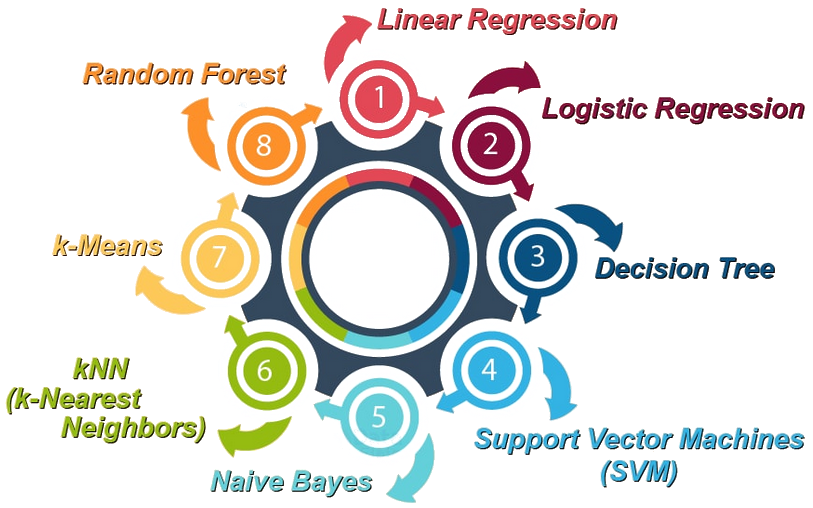

# Modelos de Machine Learning

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets # Bases de Dados
from sklearn import linear_model # Linear Regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree

In [ ]:
datasets.load_*?

In [ ]:
def ler_dados(dados):
    global df 
    df = pd.DataFrame(dados['data'], columns=dados['feature_names'])
    df['target'] = dados['target']
    
def separar(dados):  
    # 20% para base de treino
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target'],axis=1), df['target'], test_size = .2)
    print('Dados de Treino:', X_train.shape, y_train.shape)
    print('Dados de Teste:', X_test.shape, y_test.shape) 

In [ ]:
ler_dados(datasets.load_boston())
separar(df)
df.head()

## Linear Regression

A regressão linear é um dos algoritmos de aprendizado de máquina supervisionados do Python que observa recursos contínuos e prevê um resultado. Dependendo de sua execução em uma única variável ou em muitos recursos, podemos chamá-lo de regressão linear simples ou de regressão linear múltipla.

In [ ]:
dados = datasets.load_boston()
print("Dados" , dados.data.shape)
print("Alvo", dados.target.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dados.data, dados.target, test_size=0.25, random_state=0)

In [ ]:
model_linear = linear_model.LinearRegression()
model_linear.fit(X_train, y_train)

In [ ]:
y_pred_lin = model_linear.predict(X_test)
model_linear.coef_[0]
print('Coeficiente do modelo:', model_linear.coef_)
print('Interceptador do modelo:', model_linear.intercept_)

In [ ]:
score1 = model_linear.score(X_test, y_test)
score2 = r2_score(y_test, y_pred_lin)
print('Acurácia:', score1, score2)

<b>Erro Quadrático Médio</b> é útil na comparação de estimadores, principalmente se um deles for viciado Se os dois estimadores são não-viciados, o estimador mais eficaz é simplesmente aquele com a menor variância.

In [ ]:
mean_squared_error(y_test, y_pred_lin)

In [ ]:
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred_lin, c = 'pink', marker='+')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.show()

## Logistic Regression

A regressão logística é uma classificação supervisionada, é um algoritmo exclusivo de aprendizado de máquina que encontra seu uso na estimativa de valores discretos como 0/1, sim / não e verdadeiro/falso. Isso é baseado em um determinado conjunto de variáveis independentes. Usamos uma função logística para prever a probabilidade de um evento e isso nos dá uma saída entre 0 e 1.

In [ ]:
dados = datasets.load_wine()
print("Image Data Shape" , dados.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", dados.target.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dados.data, dados.target, test_size=0.25, random_state=0)

In [ ]:
model_log = LogisticRegression(C=1e4, max_iter=10000)
model_log.fit(X_train, y_train)

In [ ]:
y_pred_log = model_log.predict(X_test)
print('Coeficiente do modelo:', model_log.coef_)
print('Interceptador do modelo:', model_log.intercept_)

In [ ]:
score1 = model_log.score(X_test, y_test)
score2 = r2_score(y_test, y_pred_lin)
print('Acurácia:', score1, score2)

In [ ]:
mean_squared_error(y_test, y_pred_log)

In [ ]:
plt.scatter(X_test[:,0], y_test, color='red', zorder=17, marker='+')
# plt.plot(X_test[:,0], y_pred_log, color='blue', linewidth=2)
plt.show()

## Decision Tree
Uma árvore de decisão é útil tanto para classificação quanto para regressão, embora principalmente para classificação. Esse modelo pega uma instância, percorre a árvore e compara recursos importantes com uma instrução condicional determinada. Desce para o ramo filho esquerdo ou para a direita depende do resultado. Geralmente, os recursos mais importantes estão mais próximos da raiz.

In [4]:
dados = datasets.load_boston()
print("Dados" , dados.data.shape)
print("Alvo", dados.target.shape)

Dados (506, 13)
Alvo (506,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(dados.data, dados.target, test_size=0.25, random_state=0)

In [6]:
model_arvore = tree.DecisionTreeRegressor(max_depth=2)

# model_arvore = DecisionTreeClassifier(
#          criterion = "entropy", random_state = 100,
#          max_depth = 13, min_samples_leaf = 5)
model_arvore.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [7]:
y_pred_arv = model_arvore.predict(X_test)
score1 = model_arvore.score(X_test, y_test)
score2 = r2_score(y_test, y_pred_arv)
print('Acurácia:', score1, score2)

Acurácia: 0.5920940318375818 0.5920940318375818


In [12]:
mean_squared_error(y_test, y_pred_arv)

33.32551599016633

## Support Vector Machines (SVM)

SVM é uma Classificação Supervisionada, um dos algoritmos de aprendizado de máquina mais importantes do Python, que plota uma linha que divide diferentes categorias de seus dados. Neste algoritmo de ML, calculamos o vetor para otimizar a linha. Isso é para garantir que o ponto mais próximo de cada grupo esteja mais distante um do outro. Embora quase sempre achamos que este é um vetor linear, pode ser diferente disso.